In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]][50:]
y = iris.target[50:]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("Train split class distribution:")
print(y_train.value_counts())

print("Test split class distribution:")
print(y_test.value_counts())

# remove any class-0 samples, shift remaining labels down by 1, update target names,
# and recompute the train/test split so X_train/y_train reflect the change
# mask = (y != 0)
# X = X.loc[mask].reset_index(drop=True)
# y = (y.loc[mask] - 1).reset_index(drop=True)

# iris.target_names = iris.target_names[1:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Train split class distribution:
target
2    38
1    37
Name: count, dtype: int64
Test split class distribution:
target
1    13
2    12
Name: count, dtype: int64


In [2]:
from IPython.display import display

# display iris dataset and basic summaries (uses `iris` created in an earlier cell)

# remove rows with target == 0 from the loaded iris Bunch
# mask = iris.frame["target"] != 0
# iris.frame = iris.frame.loc[mask].reset_index(drop=True)

# # keep iris.data and iris.target consistent with the updated frame
# iris.data = iris.frame[iris.feature_names].copy()
# iris.target = iris.frame["target"].reset_index(drop=True).copy()

# # shift remaining labels down by 1 (so they become 0 and 1) and update frame
# iris.target -= 1
# iris.frame["target"] = iris.target

# # update target names if present
# if hasattr(iris, "target_names"):
#     iris.target_names = iris.target_names[1:]

df_iris = iris.frame  # iris was loaded in CELL INDEX 0
display(df_iris)      # show the full dataframe in the notebook output

print("\nInfo:")
df_iris.info()

print("\nDescribe:")
display(df_iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Describe:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


['setosa' 'versicolor' 'virginica']


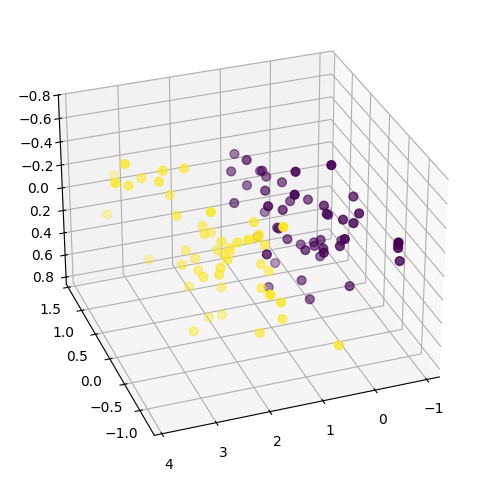

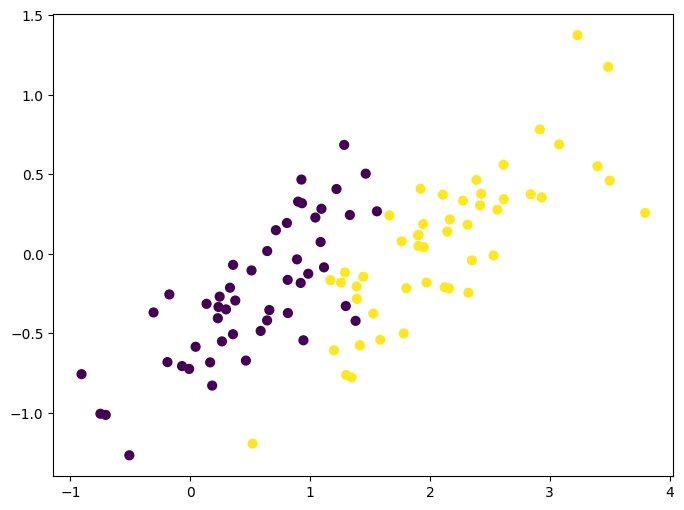

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

print(iris.target_names)

v_species = (iris.target == 1) | (iris.target == 2)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[v_species, 0],
    X_reduced[v_species, 1],
    X_reduced[v_species, 2],
    c=iris.target[v_species],
    s=40,
)
plt.show()

# plot on first two principal components
plt.figure(2, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(
    X_reduced[v_species, 0],
    X_reduced[v_species, 1],
    c=iris.target[v_species],
    s=40,
)
plt.show()


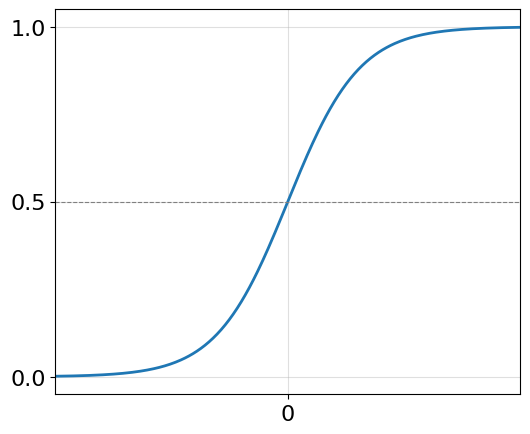

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-7.5, 7.5, 400)
y = sigmoid(x)

plt.figure(figsize=(6, 5))
plt.plot(x, y, lw=2)
# plt.axvline(0, color="k", lw=0.8, linestyle="--")
plt.axhline(0.5, color="gray", lw=0.8, linestyle="--")
plt.xlim(-6.5, 6.5)
# plt.xlabel("x")
# plt.ylabel("sigmoid(x)")
# plt.title("Sigmoid function on [-6, 6]")
tick_fontsize = 16
# yticks = list(plt.yticks()[0])
# if 0.5 not in yticks:
#     yticks.append(0.5)
yticks = {0.0, 0.5, 1.0}
xticks = {0}

plt.yticks(sorted(yticks), fontsize=tick_fontsize)
plt.xticks(sorted(xticks), fontsize=tick_fontsize)
plt.ylim(-0.05, 1.05)
plt.grid(alpha=0.4)
plt.show()

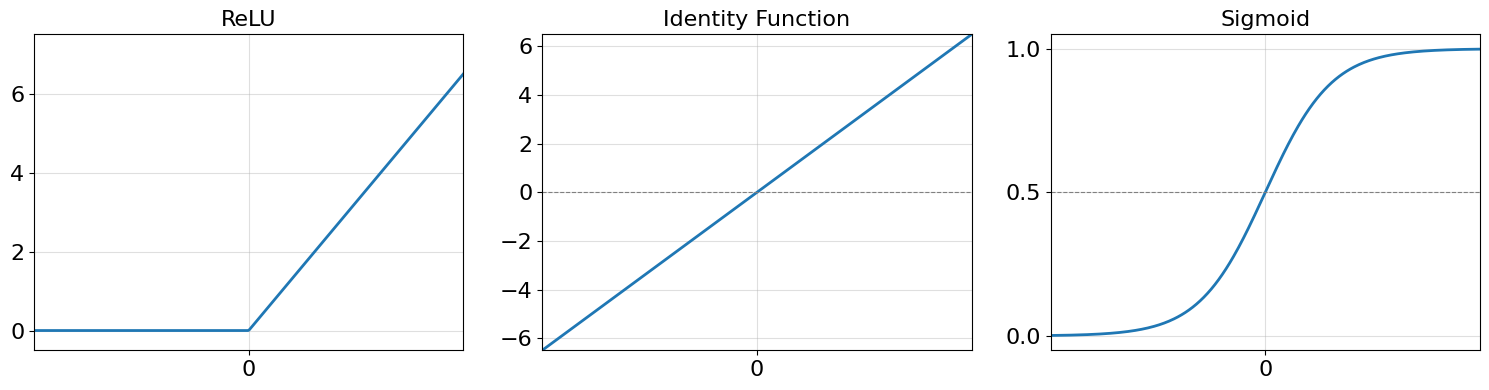

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# three subplots showing ReLU, identity and sigmoid (uses existing x, sigmoid, xticks, yticks, tick_fontsize)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# ReLU
axs[0].plot(x, np.maximum(0, x), lw=2)
axs[0].set_title("ReLU", fontsize=tick_fontsize)
axs[0].set_xlim(-6.5, 6.5)
axs[0].set_ylim(-0.5, 7.5)
axs[0].set_xticks(sorted(xticks))
axs[0].tick_params(axis="both", labelsize=tick_fontsize)
axs[0].grid(alpha=0.4)

# Identity
axs[1].plot(x, x, lw=2)
axs[1].set_title("Identity Function", fontsize=tick_fontsize)
axs[1].set_xlim(-6.5, 6.5)
axs[1].set_ylim(-6.5, 6.5)
axs[1].axhline(0, color="gray", lw=0.8, linestyle="--")
axs[1].set_xticks(sorted(xticks))
axs[1].tick_params(axis="both", labelsize=tick_fontsize)
axs[1].grid(alpha=0.4)

# Sigmoid (uses existing sigmoid function)
axs[2].plot(x, sigmoid(x), lw=2)
axs[2].set_title("Sigmoid", fontsize=tick_fontsize)
axs[2].set_xlim(-6.5, 6.5)
axs[2].set_ylim(-0.05, 1.05)
axs[2].set_yticks(sorted(yticks))
axs[2].set_xticks(sorted(xticks))
axs[2].axhline(0.5, color="gray", lw=0.8, linestyle="--")
axs[2].tick_params(axis="both", labelsize=tick_fontsize)
axs[2].grid(alpha=0.4)

plt.tight_layout()
plt.show()

In [6]:
# scatter plot of sepal length vs sepal width for target classes 1 and 2
plt.figure(figsize=(7, 5))

for label, color, marker in zip([1, 2], ["C1", "C0"], ["o", "s"]):
    sel = (y == label)
    plt.scatter(
        X.loc[sel, X.columns[0]],
        X.loc[sel, X.columns[1]],
        c=color,
        marker=marker,
        edgecolor="k",
        s=80 if label == 2 else 50,
        zorder=2 if label == 2 else 3,
        label=f"target {label-1} ({iris.target_names[label]})",
        alpha=0.9,
    )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris - Sepal length vs sepal width")
plt.legend()
plt.grid(True, alpha=0.5)

plt.show()

IndexError: Boolean index has wrong length: 400 instead of 100

<Figure size 700x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

def plot_confusion_matrix(title, plot_test_set_only, clf_model):
    clf = Pipeline(steps=[("scaler", StandardScaler()), ("clf", clf_model)])
    clf.fit(X_train, y_train)

    X_eval = X_test if plot_test_set_only else X_train
    y_eval = y_test if plot_test_set_only else y_train

    y_pred = clf.predict(X_eval)
    acc = accuracy_score(y_eval, y_pred)

    disp = ConfusionMatrixDisplay.from_predictions(
        y_eval,
        y_pred,
        display_labels=[iris.target_names[1], iris.target_names[2]],
        cmap=plt.cm.Blues,
    )
    # increase font size of the matrix numbers
    try:
        for txt in disp.text_.ravel():
            txt.set_fontsize(tick_fontsize)
    except Exception:
        for txt in disp.ax_.texts:
            txt.set_fontsize(tick_fontsize)
    # make the accuracy part bold using matplotlib mathtext
    acc_text = f"Accuracy: {acc:.2f}"
    disp.ax_.set_title(f"{title}\n{'Test Set - ' if plot_test_set_only else 'Train Set - '} " + r"$\mathbf{" + acc_text + "}$")
    plt.tight_layout()
    plt.show()

def visualize_boundary_of_plot_confusion_matrix(title, plot_test_set_only, clf_model):
    clf = Pipeline(
        steps=[
            ("scaler", StandardScaler()), 
            ("clf", clf_model)
        ]
    )
    
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)

    disp = DecisionBoundaryDisplay.from_estimator(
        clf, 
        X, 
        response_method="predict",
        xlabel=iris.feature_names[0], 
        ylabel=iris.feature_names[1],
        alpha=0.4,
        cmap=plt.cm.RdBu #ListedColormap(["#FFAAAA", "#AAAAFF"])
    )

    X_scatter = X_test if plot_test_set_only else X_train
    y_scatter = y_test if plot_test_set_only else y_train
    for label, color, marker in zip([1, 2], ["C1", "C0"], ["o", "s"]):
        sel = (y_scatter == label)
        disp.ax_.scatter(
            X_scatter.loc[sel, X_scatter.columns[0]],
            X_scatter.loc[sel, X_scatter.columns[1]],
            c=color,
            marker=marker,
            edgecolor="k",
            s=80 if label == 2 else 50,
            zorder=2 if label == 2 else 3,
            label=f"target {label-1} ({iris.target_names[label]})",
            alpha=0.9,
        )
    
    disp.ax_.set_ylim([1.8, 4])
    disp.ax_.set_xlim([4.5, 8])

    if plot_test_set_only:
        disp.ax_.set_title(f"{title}\nTest Set - Accuracy: {score:.2f}")
    else:
        disp.ax_.set_title(f"{title}\n Train Set")
    disp.ax_.legend()
    disp.ax_.legend(loc="upper left")
    plt.show()

    plot_confusion_matrix(title, plot_test_set_only, clf_model)

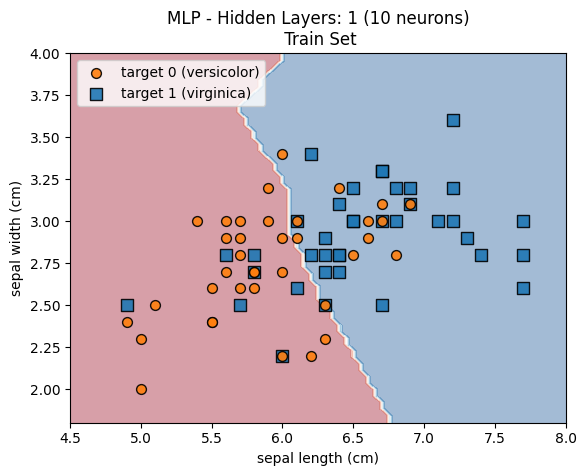

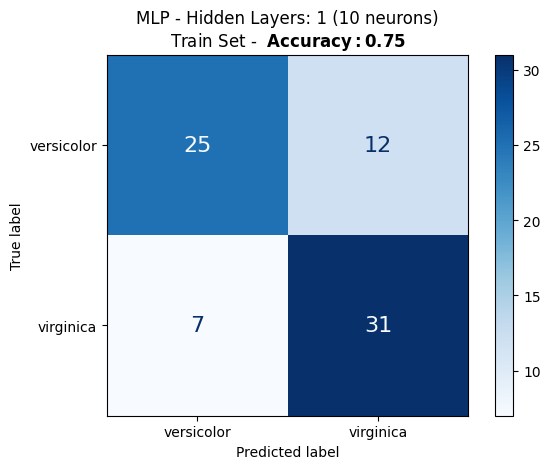

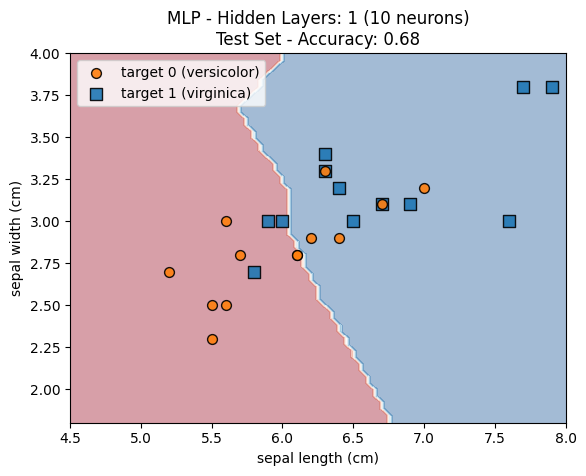

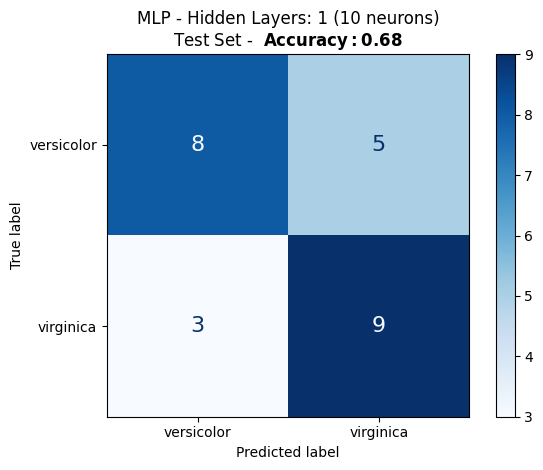

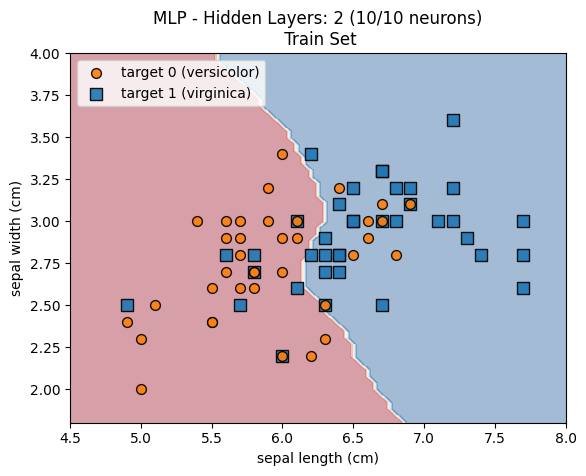

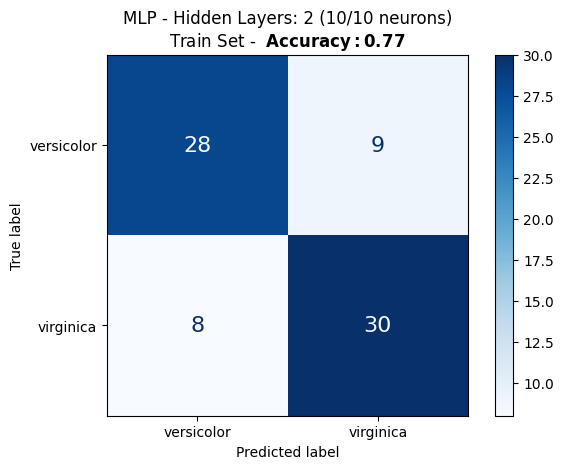

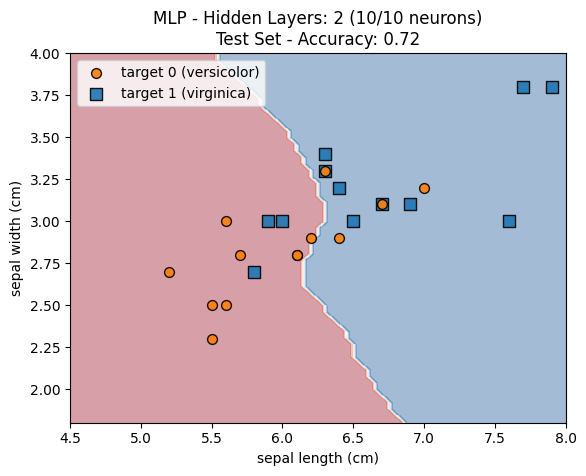

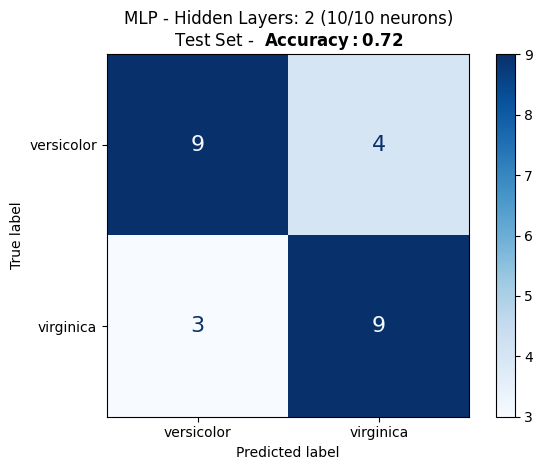

In [8]:
from sklearn.neural_network import MLPClassifier
visualize_boundary_of_plot_confusion_matrix("MLP - Hidden Layers: 1 (10 neurons)", False, MLPClassifier(alpha=0.0, hidden_layer_sizes=(10,), max_iter=2000, random_state=42))
visualize_boundary_of_plot_confusion_matrix("MLP - Hidden Layers: 1 (10 neurons)", True, MLPClassifier(alpha=0.0, hidden_layer_sizes=(10,), max_iter=2000, random_state=42))
visualize_boundary_of_plot_confusion_matrix("MLP - Hidden Layers: 2 (10/10 neurons)", False, MLPClassifier(alpha=0.0, hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42))
visualize_boundary_of_plot_confusion_matrix("MLP - Hidden Layers: 2 (10/10 neurons)", True, MLPClassifier(alpha=0.0, hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42))

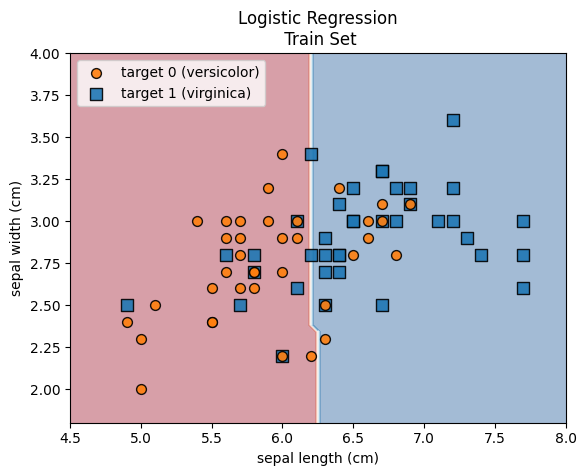

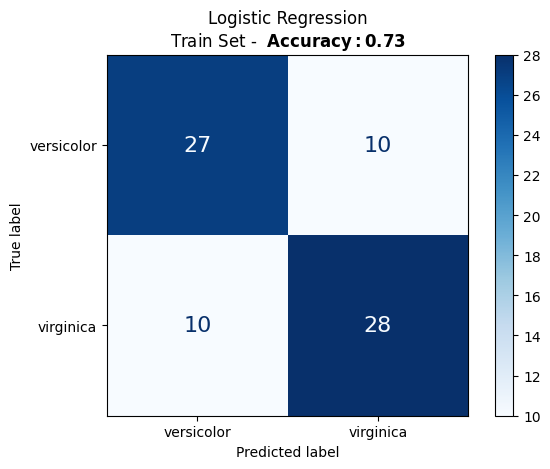

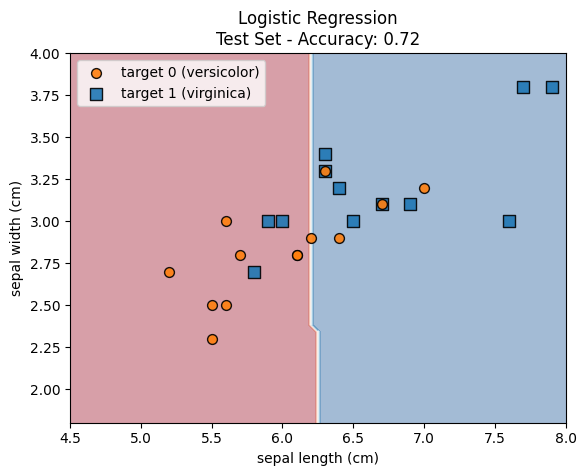

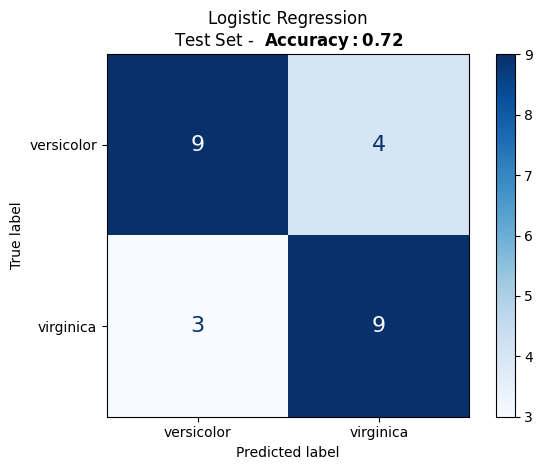

In [20]:
from sklearn.linear_model import LogisticRegression
visualize_boundary_of_plot_confusion_matrix("Logistic Regression", False, LogisticRegression(penalty=None,random_state=42))
visualize_boundary_of_plot_confusion_matrix("Logistic Regression", True, LogisticRegression(penalty=None,random_state=42))